# 📊 EDA – Loan Risk Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('C:\\Users\\yacin\\Desktop\\EY_Project\\P1M2_Yonathan_Anggraiwan.csv', sep=';')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,01/01/2018,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,02/01/2018,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,03/01/2018,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,04/01/2018,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,05/01/2018,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [9]:
df.describe(include='all')

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,20000.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,20000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,01/01/2018,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,10041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.752600,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,NaN,11.622713,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,NaN,32.000000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


In [10]:
df.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

### 📈 Distribution des variables numériques

📊 **Remarques techniques** :
- Certaines variables comme `AnnualIncome`, `LoanAmount`, `NetWorth` sont très asymétriques.
- Prévoir normalisation ou transformation log si nécessaire.

💼 **Conséquences métier** :
- Présence de clients à très hauts revenus ou très endettés.
- Peut nécessiter un traitement spécial pour éviter les biais.

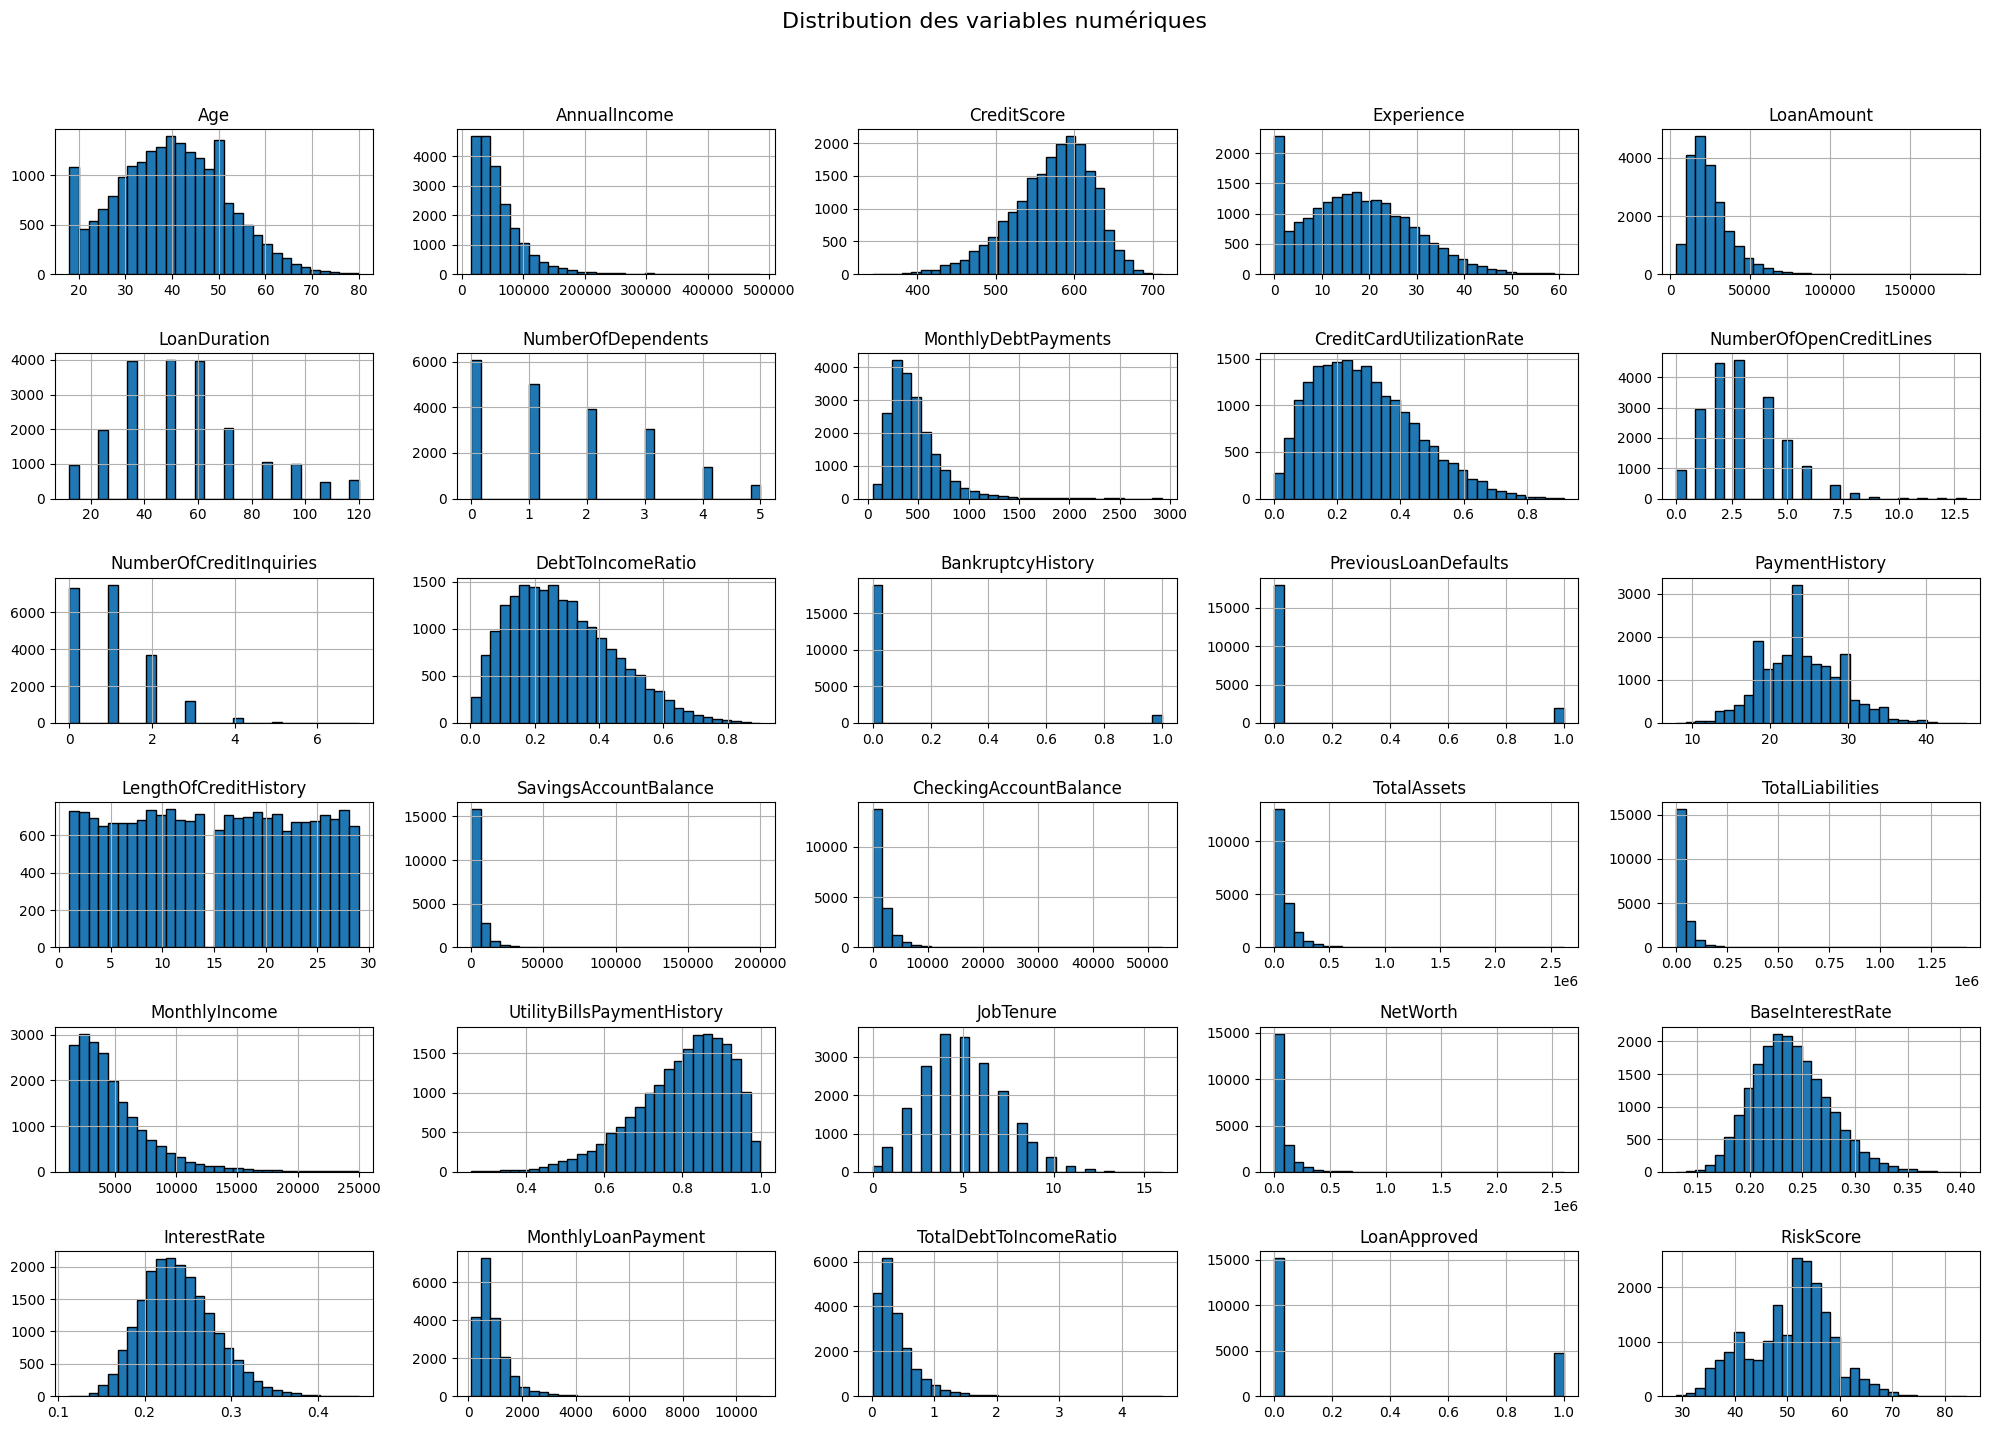

In [14]:
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### 📈 Distribution de la variable cible

📊 **Remarques techniques** :
- Forte dominance de la classe `0` (prêt refusé).
- Le dataset est déséquilibré, il faut appliquer un rééquilibrage (SMOTE, class_weight, etc.).

💼 **Conséquences métier** :
- Processus d'approbation rigide ?
- Risque d'ignorer des profils solvables mais atypiques.

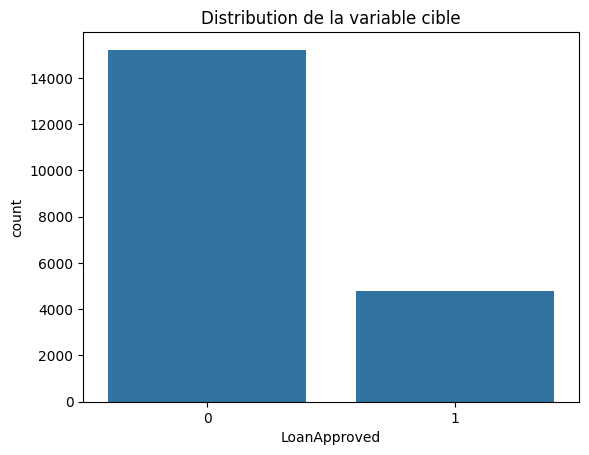

In [11]:
sns.countplot(x='LoanApproved', data=df)
plt.title('Distribution de la variable cible')
plt.show()

In [15]:
df.select_dtypes(include='object').nunique()


ApplicationDate        20000
EmploymentStatus           3
EducationLevel             5
MaritalStatus              4
HomeOwnershipStatus        4
LoanPurpose                5
dtype: int64

### 📈 Boxplots variables vs LoanApproved

📊 **Remarques techniques** :
- Variables comme `CreditScore`, `InterestRate`, `LoanAmount` sont discriminantes.
- Intéressantes pour la modélisation.

💼 **Conséquences métier** :
- Les scores de crédit et montants de prêts jouent un rôle fort dans la décision.
- Une dépendance excessive pourrait exclure des bons profils peu standardisés.

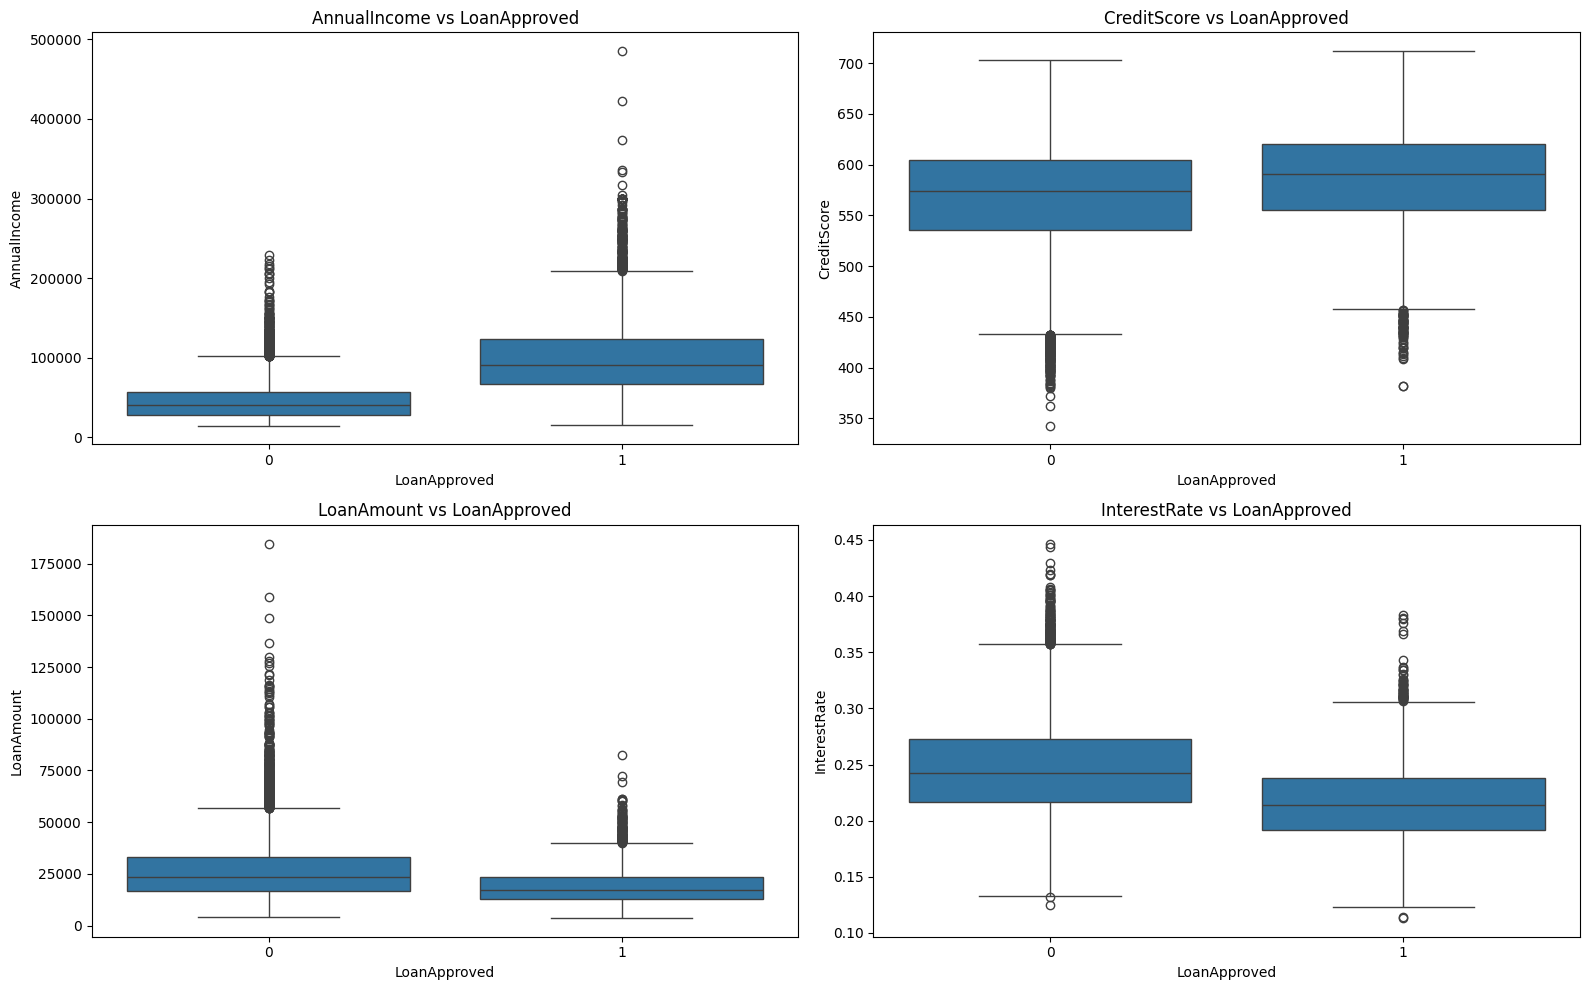

In [16]:
selected_vars = ["AnnualIncome", "CreditScore", "LoanAmount", "InterestRate"]

plt.figure(figsize=(16, 10))
for i, var in enumerate(selected_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x="LoanApproved", y=var, data=df)
    plt.title(f"{var} vs LoanApproved")
plt.tight_layout()
plt.show()


### 📈 Pairplot variables clés

📊 **Remarques techniques** :
- Des interactions visibles entre `LoanAmount`, `InterestRate`, `CreditScore`.
- Intéressant pour modèles de type arbre.

💼 **Conséquences métier** :
- Le risque ne se lit pas sur une seule variable.
- Ouvre la voie à des décisions basées sur des combinaisons de facteurs.

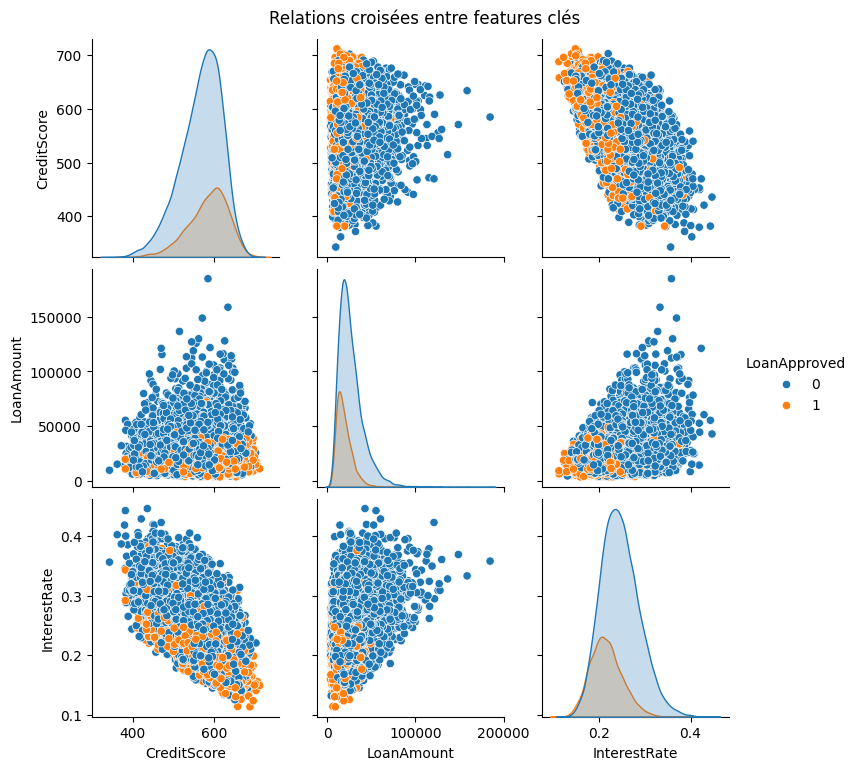

In [17]:
df["LoanApproved"] = df["LoanApproved"].astype("category")
sns.pairplot(df[["CreditScore", "LoanAmount", "InterestRate", "LoanApproved"]], hue="LoanApproved", diag_kind="kde")
plt.suptitle("Relations croisées entre features clés", y=1.02)
plt.show()


### 📈 Matrice de corrélation

📊 **Remarques techniques** :
- Variables fortement corrélées entre elles (`RiskScore`, `InterestRate`, etc.).
- Risque de redondance → attention à la multicolinéarité.

💼 **Conséquences métier** :
- Ces indicateurs sont tous liés à la capacité de remboursement.
- Bien les comprendre permet une meilleure stratégie de scoring.

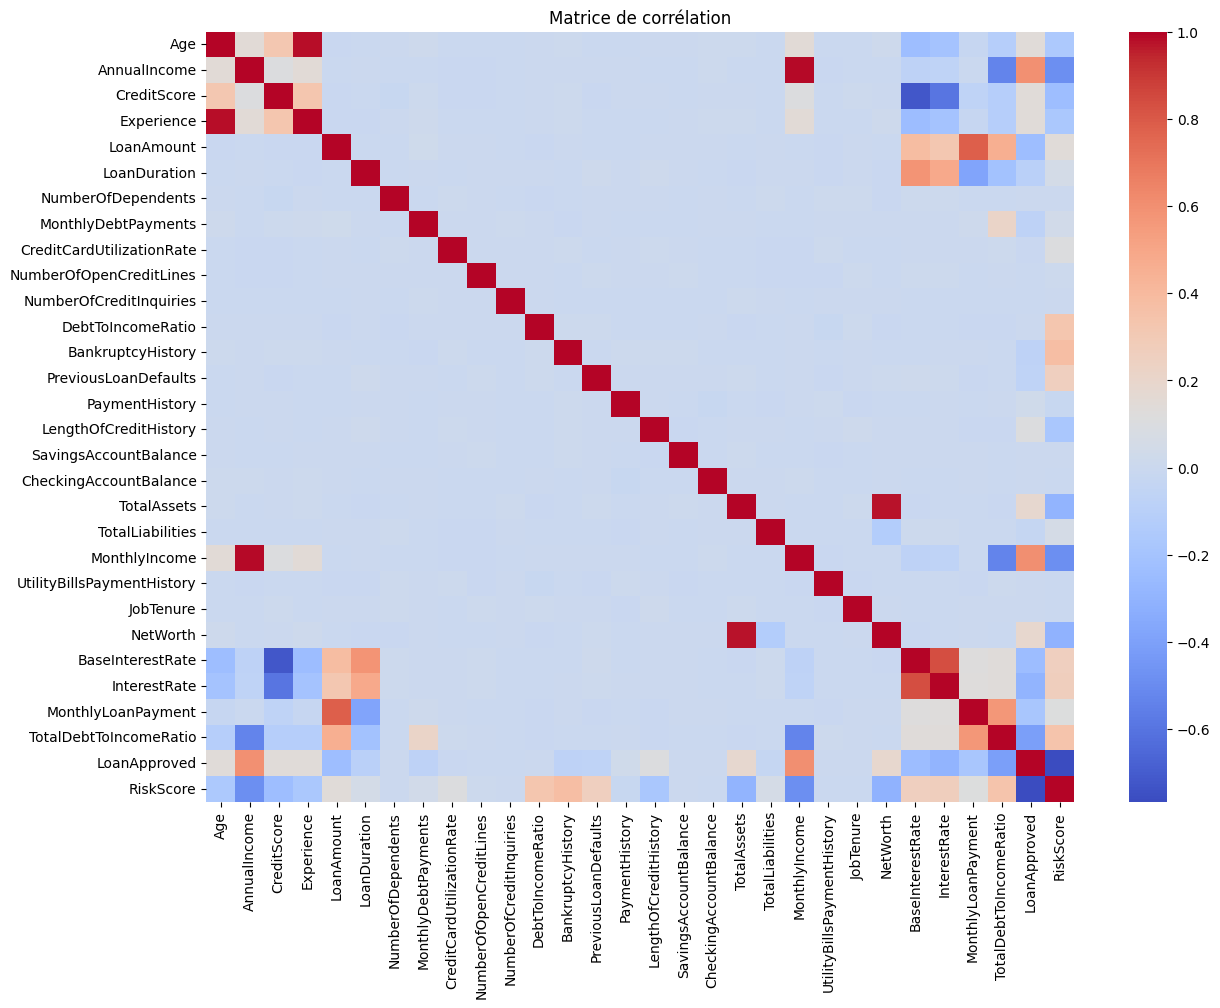

In [12]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Matrice de corrélation')
plt.show()

### 📈 Projection PCA

📊 **Remarques techniques** :
- Séparation partielle des classes → bon potentiel pour modèles non linéaires.
- PCA utile pour visualisation et réduction de dimension.

💼 **Conséquences métier** :
- Permet d’observer des groupes naturels de clients.
- Aide à construire des segments de risque plus nuancés.

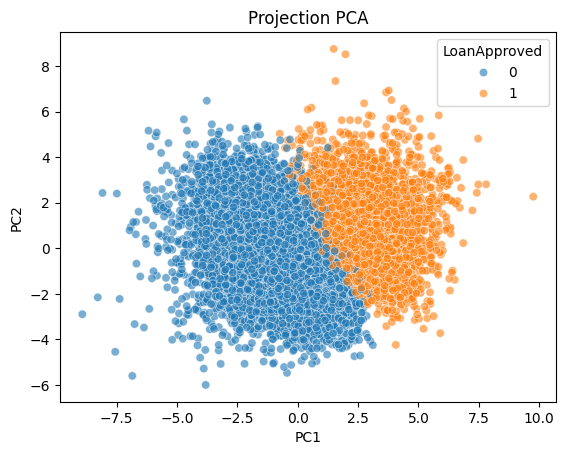

In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64']).dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['LoanApproved'] = df['LoanApproved']
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='LoanApproved', alpha=0.6)
plt.title('Projection PCA')
plt.show()